<a href="https://colab.research.google.com/github/JUANOSORIOG/Senales_y_Sistemas/blob/main/3_SerieyTransformadaFourier/4_ModulacionAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación modulación por amplitud con detección coherente (AM) en Python

- La modulación se entiende como el proceso mediante el cual una señal mensaje se adecuda al medio de transmisión.

- En radiofrecuencia, la modulación básica consiste en manipular la amplitud de una señal de alta frecuencia, denominada portadora, respecto al mensaje.

- Dicho proceso se conoce como modulación por amplitud. Para más detalle ver [modulación AM](https://en.wikipedia.org/wiki/Amplitude_modulation).

- Se requiere entonces de una portadora (carrier) senoidal/cosenoidal:

$$c(t)=A_c\sin(2\pi F_c t)$$

- Para ilustrar el proceso, se trabaja con un mensaje tipo sen/cos:

$$m(t) = A_m \cos(2\pi F_m t)$$

- La modulación AM puede calibrarse en términos del índice de modulación:

$$I_m = \frac{Peak\{|m(t)|\}}{A_c}$$

 donde $Peak\{|m(t)|\}$ es el valor pico (máximo) de $|m(t)|$.



In [26]:
import numpy as np
import matplotlib.pyplot as plt
#Frecuencia portadora y muestreo

Fc = 100 #frecuencia de portadora

Fm = 10 #frecuencia del mensaje
Am = 1 #amplitud del mensaje


ti = 0
tf = 5/Fm #cantidad de periodos a graficar de la

Fs = 5*Fc #frecuencia muestreo

t = np.arange(ti,tf,1/Fs) #vector del tiempo
m = Am*np.cos(2*np.pi*Fm*t) #mensaje #

Im = 0.8 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im

Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.cos(2*np.pi*Fc*t) #portadora
print(Ac)

1.25


- Se grafican las señales mensaje y portadora:

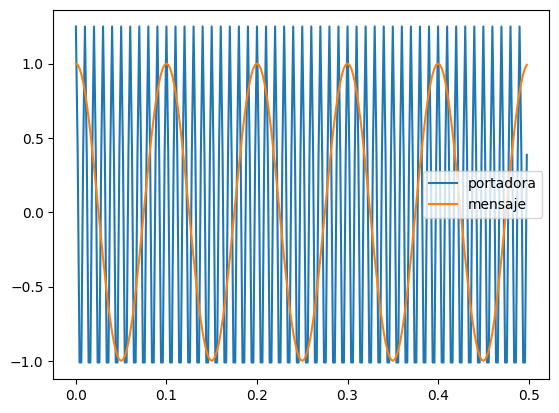

In [27]:
plt.plot(t,c,label='portadora')
plt.plot(t,m,label='mensaje')
plt.legend()
plt.show()

- La señal a transmitir, señal modulada, en AM se cálcula como:

$$y(t)= \left(1+\frac{m(t)}{A_c}\right)c(t)$$

In [28]:
y = (1+m/Ac)*c #señal modulada en AM

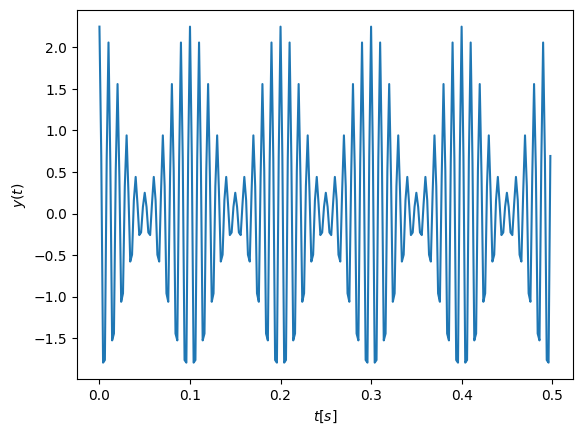

In [29]:
plt.plot(t,y)
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.show()

- A continuación, se presenta el espectro de la señal mensaje, portadora y modulada.

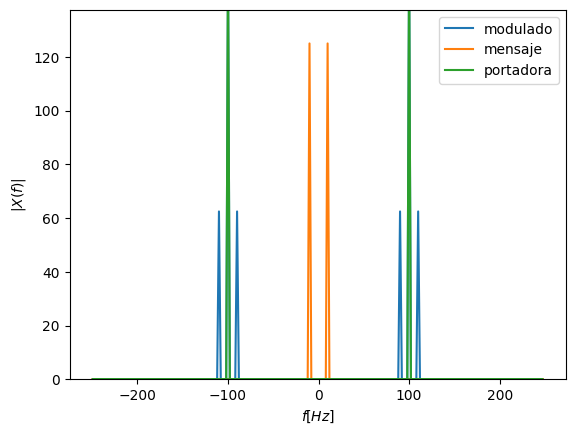

In [30]:
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()

In [22]:
#Xfc = np.fft.rfft(c)
#Xfm = np.fft.rfft(m)
#Xfy = np.fft.rfft(y)

#vfre = np.fft.rfftfreq(len(c),1/Fs)

#plt.plot(vfre,abs(Xfy),label='modulado')
#plt.plot(vfre,abs(Xfm),label='mensaje')
#plt.plot(vfre,abs(Xfc),label='portadora')
#plt.legend()
#plt.xlabel('$f [Hz]$')
#plt.ylabel('$|X(f)|$')
#plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
#plt.show()

In [23]:
d = y*c

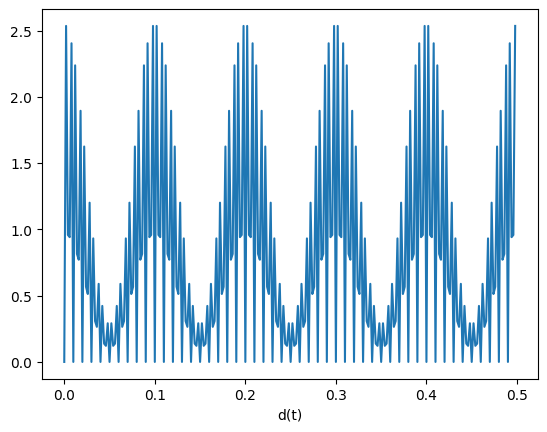

In [24]:
plt.plot(t,d)
plt.xlabel('t')
plt.xlabel('d(t)')
plt.show()

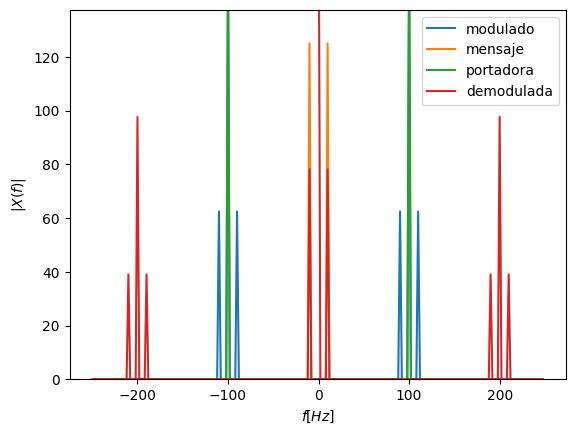

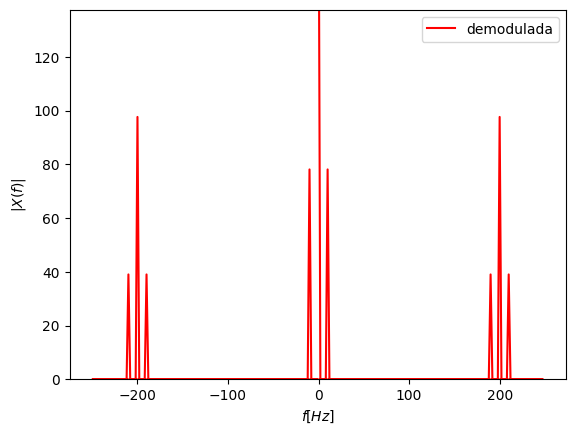

In [25]:
Xfc = np.fft.fft(c)
Xfm = np.fft.fft(m)
Xfy = np.fft.fft(y)
Xfd = np.fft.fft(d)

vfre = np.fft.fftfreq(len(c),1/Fs)

plt.plot(vfre,abs(Xfy),label='modulado')
plt.plot(vfre,abs(Xfm),label='mensaje')
plt.plot(vfre,abs(Xfc),label='portadora')
plt.plot(vfre,abs(Xfd),label='demodulada')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()


plt.plot(vfre,abs(Xfd),label='demodulada',c='r')
plt.legend()
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.ylim([min(abs(Xfm)), 1.1*max(abs(Xfm))])
plt.show()


In [10]:
Xfd.shape

(250,)

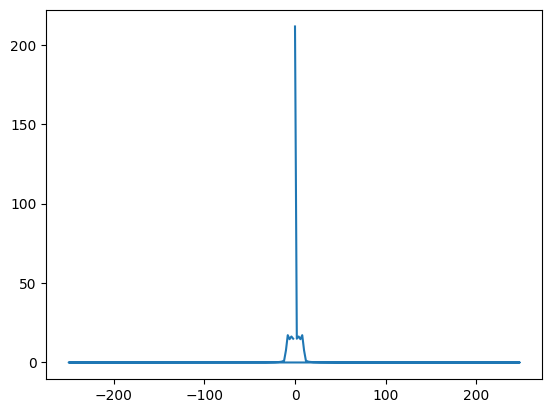

In [11]:

f1 = 50 #frecuencia en Hz corte 1
ind = ~(abs(vfre)<f1)#~((vf > f1) & (vf < f2)) #frecuencias eliminar-> recueder que ~ actua como negación
Xfd[ind] = 0
plt.plot(vfre,abs(Xfd))

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


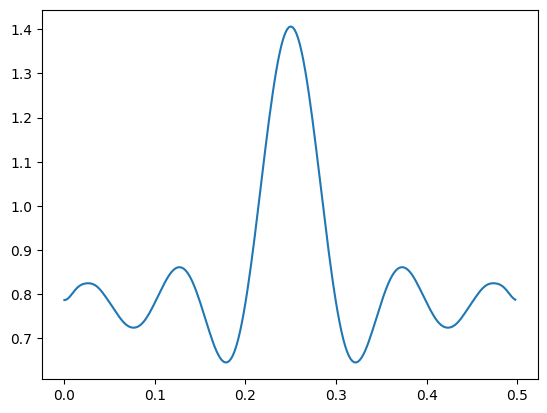

In [12]:
mr = np.fft.ifft(Xfd)

plt.plot(t,mr)

Amplitud de la Portadora calculada (Ac): 1.25


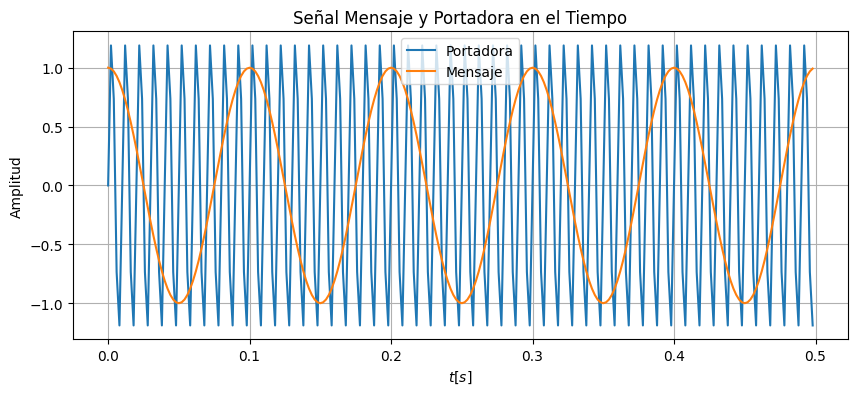

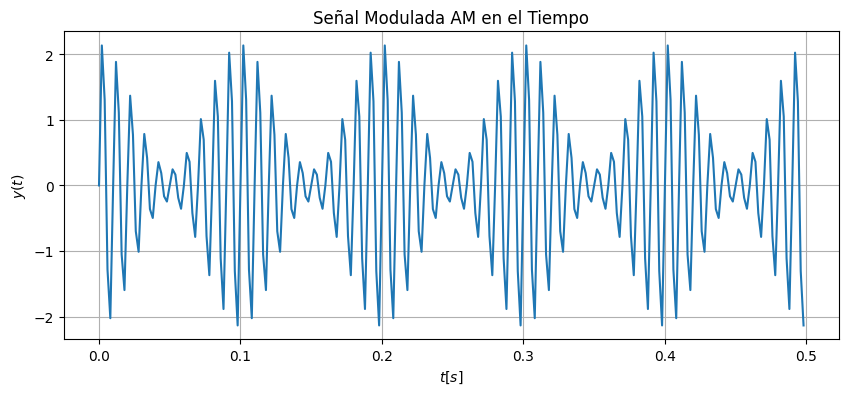

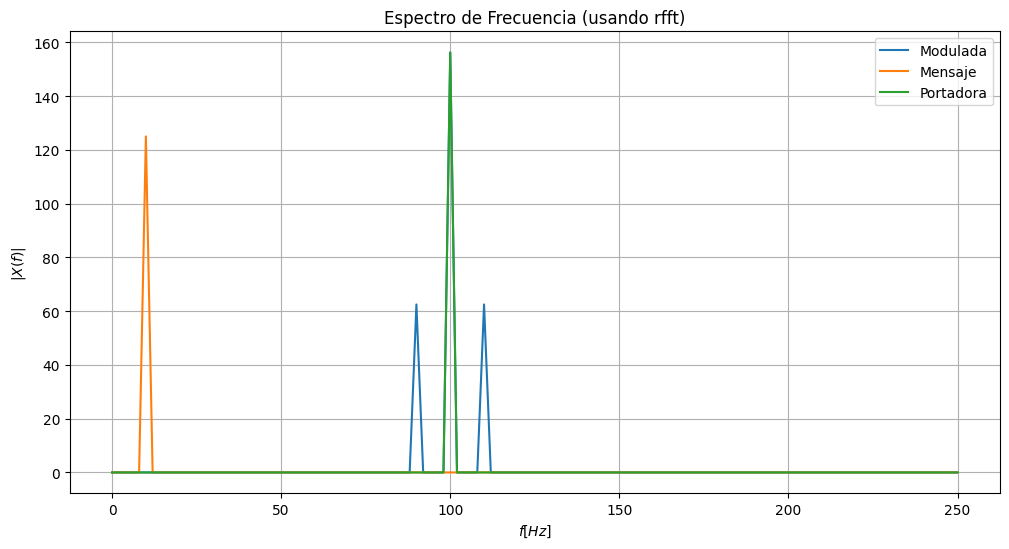

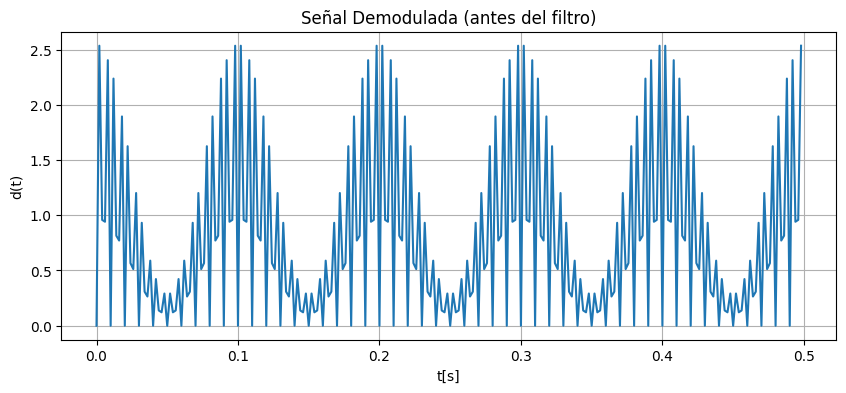

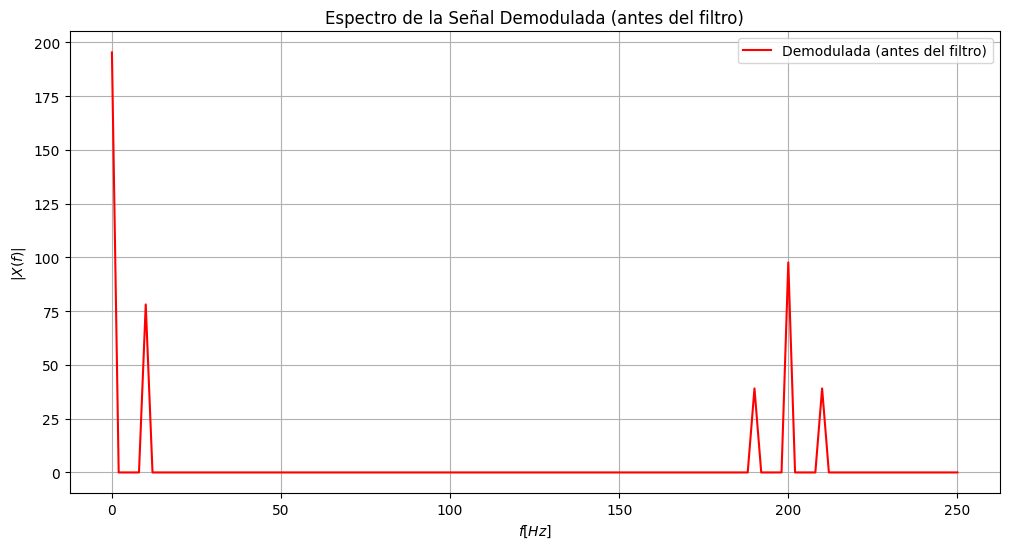

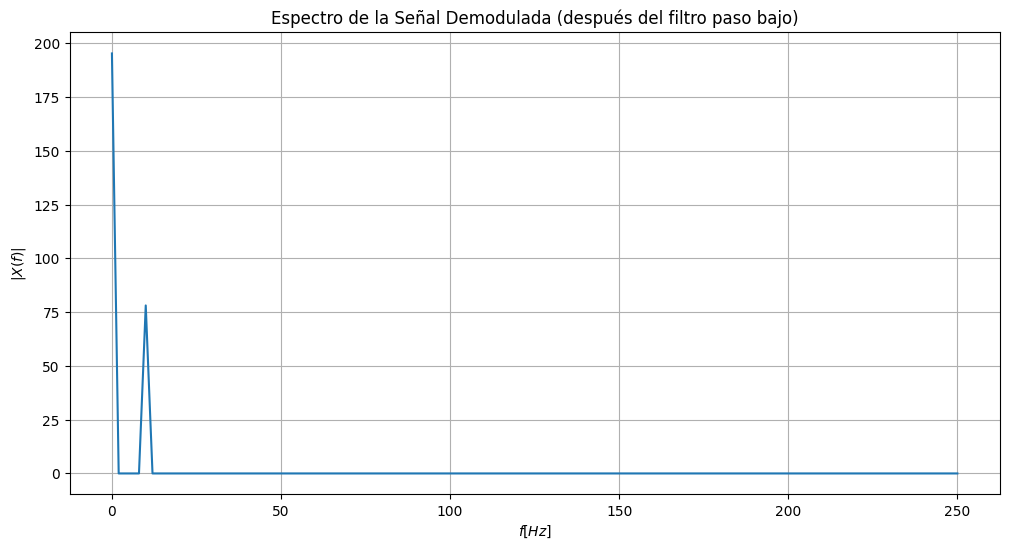

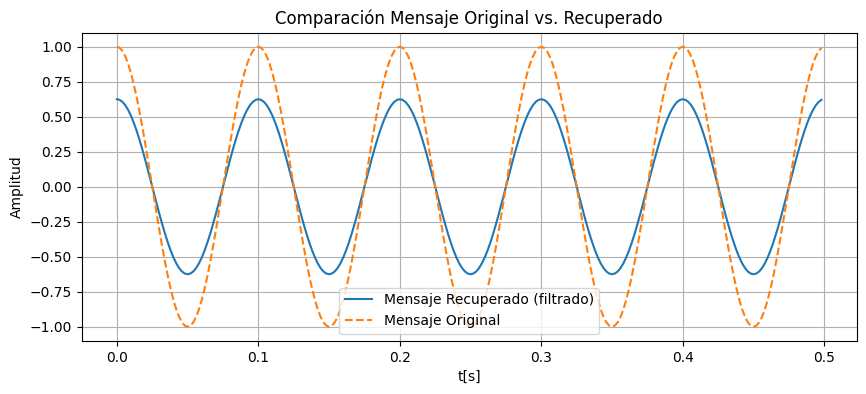

In [16]:
# prompt: Consulte en que consiste la modulaci ´ on por amplitud por ´
# deteccion coherente y sus aplicaciones. Genere un ejemplo ´
# ilustrativo sobre Python en el que se grafique las senales en ˜
# el tiempo y en frecuencia (utilizando la ‘rfft‘) para: senal ˜
# mensaje tipo pulso rectangular y senal mensaje tipo coseno. ˜
# El usuario podra definir el ´ ´ındice de modulacion de inter ´ es.

#@markdown Seleccione el tipo de señal mensaje y el índice de modulación:
tipo_mensaje = 'Coseno' #@param ["Pulso Rectangular", "Coseno"]
indice_modulacion = 0.8 #@param {type:"number"}

# Aseguramos que el índice de modulación esté entre 0 y 1 para una modulación AM estándar.
if indice_modulacion > 1:
  print("Advertencia: Índice de modulación mayor a 1. Puede ocurrir sobremodulación.")
  indice_modulacion = 1.0
elif indice_modulacion < 0:
    print("Advertencia: Índice de modulación negativo. Se usará el valor absoluto.")
    indice_modulacion = abs(indice_modulacion)

# Re-calcular el mensaje basado en la selección
if tipo_mensaje == 'Pulso Rectangular':
  # Creamos un pulso rectangular. Aquí definimos su ancho y centro.
  ancho_pulso = tf/2.0 # Ancho del pulso
  centro_pulso = tf/2.0 # Centro del pulso
  m = np.where((t >= centro_pulso - ancho_pulso/2) & (t <= centro_pulso + ancho_pulso/2), Am, 0)
elif tipo_mensaje == 'Coseno':
  m = Am*np.cos(2*np.pi*Fm*t) # mensaje tipo coseno

# Re-calcular la amplitud de la portadora con el índice de modulación seleccionado
Ac = max(abs(m))/indice_modulacion if indice_modulacion > 1e-6 else max(abs(m)) * 1000 # Evitar división por cero si Im es muy pequeño
c = Ac*np.sin(2*np.pi*Fc*t) # portadora

print(f'Amplitud de la Portadora calculada (Ac): {Ac}')

# Graficar las señales mensaje y portadora (actualizado)
plt.figure(figsize=(10, 4))
plt.plot(t, c, label='Portadora')
plt.plot(t, m, label='Mensaje')
plt.title('Señal Mensaje y Portadora en el Tiempo')
plt.xlabel('$t[s]$')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Calcular y graficar la señal modulada (actualizado)
y = (1+m/Ac)*c # señal modulada en AM
plt.figure(figsize=(10, 4))
plt.plot(t, y)
plt.title('Señal Modulada AM en el Tiempo')
plt.xlabel('$t[s]$')
plt.ylabel('$y(t)$')
plt.grid(True)
plt.show()

# Calcular y graficar los espectros de las señales usando rfft (actualizado)
Xfc_rfft = np.fft.rfft(c)
Xfm_rfft = np.fft.rfft(m)
Xfy_rfft = np.fft.rfft(y)

vfre_rfft = np.fft.rfftfreq(len(c), 1/Fs)

plt.figure(figsize=(12, 6))
plt.plot(vfre_rfft, abs(Xfy_rfft), label='Modulada')
plt.plot(vfre_rfft, abs(Xfm_rfft), label='Mensaje')
plt.plot(vfre_rfft, abs(Xfc_rfft), label='Portadora')
plt.title('Espectro de Frecuencia (usando rfft)')
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.legend()
plt.grid(True)
plt.show()

# Demodulación coherente (multiplicación por la portadora)
d = y * c

plt.figure(figsize=(10, 4))
plt.plot(t, d)
plt.title('Señal Demodulada (antes del filtro)')
plt.xlabel('t[s]')
plt.ylabel('d(t)')
plt.grid(True)
plt.show()

# Espectro de la señal demodulada antes del filtro (usando rfft)
Xfd_rfft = np.fft.rfft(d)
plt.figure(figsize=(12, 6))
plt.plot(vfre_rfft, abs(Xfd_rfft), label='Demodulada (antes del filtro)', c='r')
plt.title('Espectro de la Señal Demodulada (antes del filtro)')
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.legend()
plt.grid(True)
plt.show()

# Aplicar filtro paso bajo para recuperar la señal mensaje (ejemplo simple)
# La frecuencia de corte debe ser mayor a Fm pero menor a 2*Fm o Fc-Fm
f_corte = Fm * 1.5 # Frecuencia de corte del filtro paso bajo
indices_filtrados = (vfre_rfft > f_corte)
Xfd_rfft_filtrado = Xfd_rfft.copy()
Xfd_rfft_filtrado[indices_filtrados] = 0

plt.figure(figsize=(12, 6))
plt.plot(vfre_rfft, abs(Xfd_rfft_filtrado))
plt.title('Espectro de la Señal Demodulada (después del filtro paso bajo)')
plt.xlabel('$f [Hz]$')
plt.ylabel('$|X(f)|$')
plt.grid(True)
plt.show()

# Inversa rfft para obtener la señal recuperada en el tiempo
mr_filtrado = np.fft.irfft(Xfd_rfft_filtrado)

# Normalizamos la señal recuperada para compararla con la original (puede requerir ajuste de escala)
# La señal demodulada tendrá un componente DC y estará escalada.
# Intentamos centrar y escalar (esto es una aproximación simple)
mr_filtrado = mr_filtrado - np.mean(mr_filtrado)
# Escalamos basándonos en la amplitud original del mensaje si es necesario
# mr_filtrado = mr_filtrado * (Am / np.max(abs(mr_filtrado))) # Descomentar y ajustar si es necesario

plt.figure(figsize=(10, 4))
plt.plot(t, mr_filtrado, label='Mensaje Recuperado (filtrado)')
plt.plot(t, m, label='Mensaje Original', linestyle='--')
plt.title('Comparación Mensaje Original vs. Recuperado')
plt.xlabel('t[s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()
